In [1]:
import glob
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from castor import spec2sqr

In [3]:
%matplotlib inline
import matplotlib as mpl
sns.set_style("darkgrid")
mpl.rcParams["figure.figsize"] = (16, 9)
mpl.rcParams["font.family"] = "DejaVu Sans"
mpl.rcParams["image.cmap"] = "jet"

In [4]:
pollux = glob.glob("/mnt/arch/POLLUX/spec/*")
wave, flux, norm = np.loadtxt(random.choice(pollux), unpack=True)
wi = 3700 < wave; wf = wave < 9100; ww = wi * wf

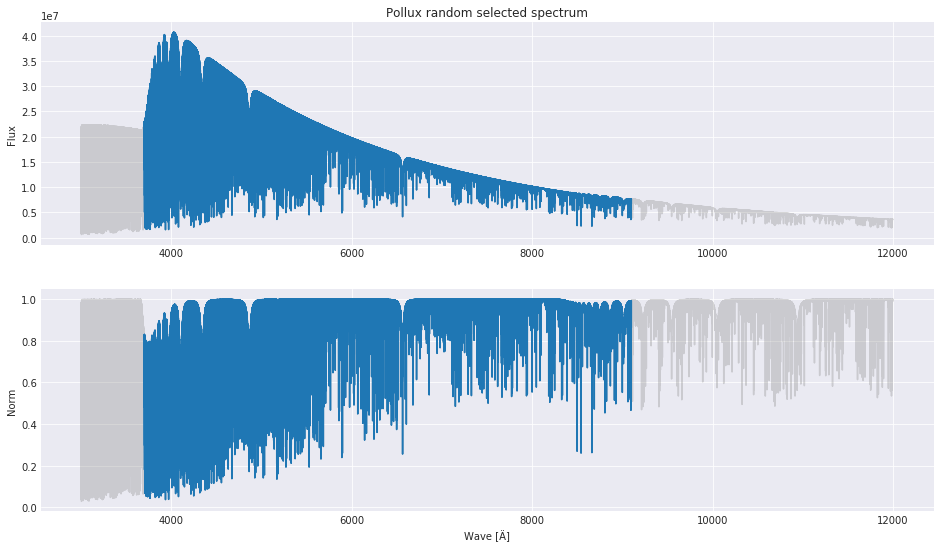

In [5]:
plt.subplot(2, 1, 1)
plt.title("Pollux random selected spectrum")
plt.ylabel("Flux")
plt.plot(wave, flux, color="gray", alpha=0.3);
plt.plot(wave[ww], flux[ww])

plt.subplot(2, 1, 2)
plt.ylabel("Norm")
plt.plot(wave, norm, color="gray", alpha=0.3)
plt.plot(wave[ww], norm[ww])
plt.xlabel("Wave [Ä]")

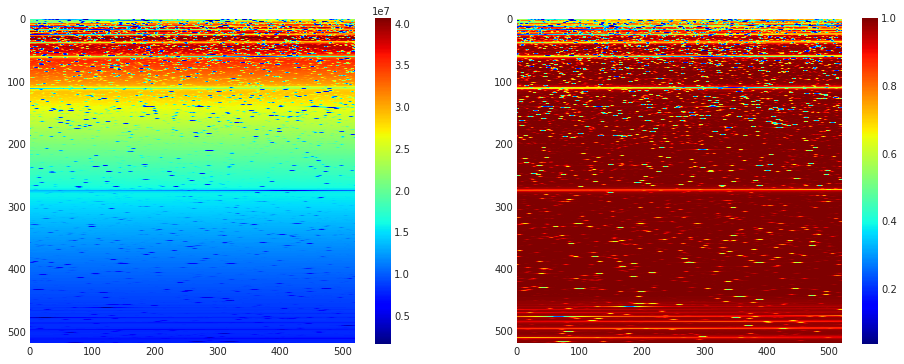

In [6]:
plt.figure(figsize=(16,6))
plt.subplot(121); plt.imshow(spec2sqr(flux[ww], cut=True)); plt.colorbar(); plt.grid(False)
plt.subplot(122); plt.imshow(spec2sqr(norm[ww])); plt.colorbar(); plt.grid(False)

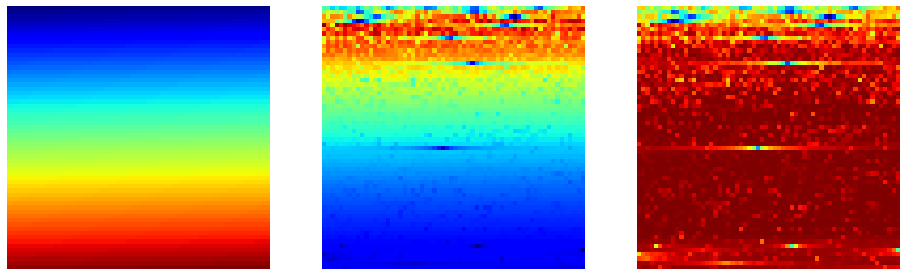

In [7]:
frames = [wave, flux, norm]
for a, the in enumerate(frames):
    sub = np.copy(the[ww])
    sub.resize((4000, 69))
    sqr = spec2sqr(sub.sum(axis=1), a=62)
    plt.subplot(131+a)
    plt.xticks([]); plt.yticks([])
    plt.imshow(sqr)

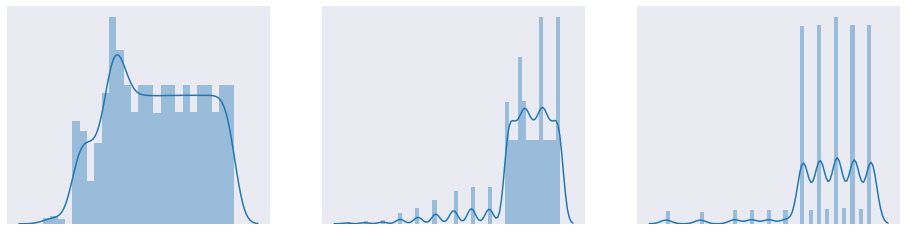

In [8]:
data = np.load("pollux.npy")
plt.figure(figsize=(16,4))
for i in range(3):
    plt.subplot(131+i)
    plt.xticks([]); plt.yticks([])
    sns.distplot(data[:,i])

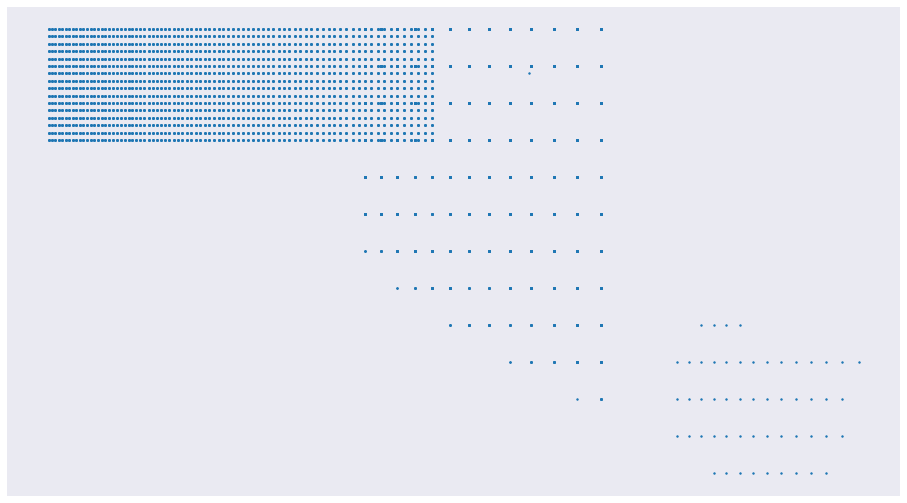

In [9]:
plt.xticks([]); plt.yticks([])
plt.scatter(np.log10(data[:,0]), data[:,1], s=2);
plt.gca().invert_xaxis()